In [101]:
import pandas as pd 
import os
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from subprocess import check_output
import numpy as np
import matplotlib.pyplot as plt
import warnings
import math
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima.model import ARIMAResults
from pandas import datetime
from sklearn.metrics import mean_squared_error
df = pd.read_csv("../Resources/btcjoin.csv", index_col='date', parse_dates=['date'])
df = df.drop(columns=['volume','change', 'low', 'high', 'open','value','address','mined'])
df['price']=df['price'].str.replace(',','')
df['price']=df['price'].astype("float")
print(df.tail())
#https://www.projectpro.io/article/how-to-build-arima-model-in-python/544
#https://www.projectpro.io/recipes/find-optimal-paramters-for-arima-model


              price
date               
2022-10-21  19162.6
2022-10-22  19204.8
2022-10-23  19571.2
2022-10-24  19331.5
2022-10-25  20073.1


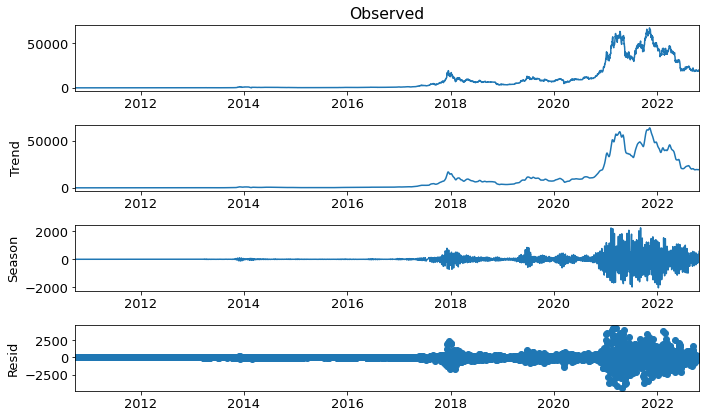

In [102]:
#https://towardsdev.com/auto-arima-hyperparameter-search-ab991a21c2bd
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
plt.rc('figure',figsize=(10,6))
plt.rc('font',size=13)
stl = STL(df, period=12)
res = stl.fit()
fig = res.plot()

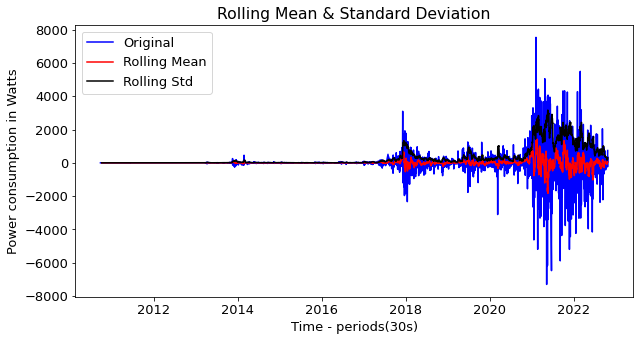

Results of Dickey-Fuller Test:
Test Statistic                -1.057168e+01
p-value                        7.278051e-19
#Lags Used                     3.100000e+01
Number of Observations Used    4.353000e+03
Critical Value (1%)           -3.431853e+00
Critical Value (5%)           -2.862204e+00
Critical Value (10%)          -2.567124e+00
dtype: float64
The time series is stationary at 95% level of confidence


In [103]:
def test_stationarity(timeseries, rolling=12):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(rolling).mean()
    rolstd = timeseries.rolling(rolling).std()

    #Plot rolling statistics:
    plt.figure(figsize=(10, 5))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.title('Power consumption Old data')
    plt.xlabel('Time - periods(30s)')
    plt.ylabel('Power consumption in Watts')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:') 
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dfoutput['p-value'] < 0.05:
        print('The time series is stationary at 95% level of confidence')
    else:
        print('The time series is not stationary at 95% level of confidence')
df_diff = df - df.shift(1)
df_diff = df_diff.dropna()
test_stationarity(df_diff, rolling=12)

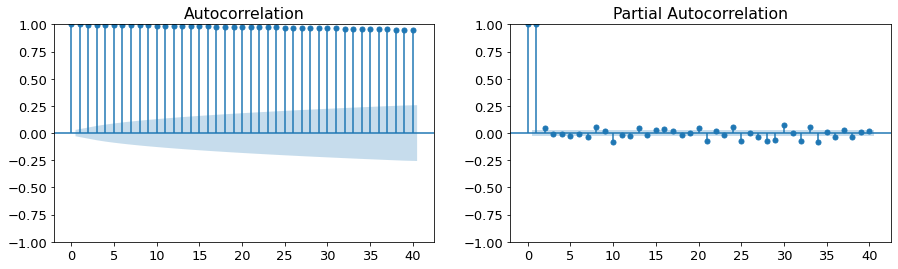

In [104]:
fig, axes = plt.subplots(1, 2, figsize=(15,4))

fig = sm.graphics.tsa.plot_acf(df, 
                               lags=40, 
                               ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(df, 
                                lags=40, 
                                ax=axes[1])

In [105]:
train_data = df[1:len(df)-12]
test_data = df[len(df)-12:]

In [106]:
p_values = [1,2,3,4,5,6,7]
d_values = range(0, 3)
q_values = range(0, 3)


In [109]:
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,d,q)
            warnings.filterwarnings("ignore")
            model = ARIMA(train_data.values, order=order).fit()
            predictions = model.predict(start=len(train_data), end=len(train_data) + len(test_data)-1)
            error = mean_squared_error(test_data, predictions)
            print('ARIMA%s (MSE=%.3f).sort' % (order,error))
            

ARIMA(1, 0, 0) MSE=89229.852
ARIMA(1, 0, 1) MSE=88361.220
ARIMA(1, 0, 2) MSE=88477.629
ARIMA(1, 1, 0) MSE=78965.088
ARIMA(1, 1, 1) MSE=79089.436
ARIMA(1, 1, 2) MSE=81262.033
ARIMA(1, 2, 0) MSE=1757781.412
ARIMA(1, 2, 1) MSE=78318.375
ARIMA(1, 2, 2) MSE=78985.056
ARIMA(2, 0, 0) MSE=88370.021
ARIMA(2, 0, 1) MSE=88488.947
ARIMA(2, 0, 2) MSE=90199.128
ARIMA(2, 1, 0) MSE=79161.771
ARIMA(2, 1, 1) MSE=79166.010
ARIMA(2, 1, 2) MSE=81265.604
ARIMA(2, 2, 0) MSE=883309.986
ARIMA(2, 2, 1) MSE=78657.870
ARIMA(2, 2, 2) MSE=76911.015
ARIMA(3, 0, 0) MSE=88484.088
ARIMA(3, 0, 1) MSE=88465.734
ARIMA(3, 0, 2) MSE=80950.840
ARIMA(3, 1, 0) MSE=79202.099
ARIMA(3, 1, 1) MSE=78239.535
ARIMA(3, 1, 2) MSE=81189.112
ARIMA(3, 2, 0) MSE=232567.144
ARIMA(3, 2, 1) MSE=78821.843
ARIMA(3, 2, 2) MSE=77824.129
ARIMA(4, 0, 0) MSE=88499.948
ARIMA(4, 0, 1) MSE=88503.580
ARIMA(4, 0, 2) MSE=91902.467
ARIMA(4, 1, 0) MSE=78287.731
ARIMA(4, 1, 1) MSE=77891.377
ARIMA(4, 1, 2) MSE=77691.214
ARIMA(4, 2, 0) MSE=108307.793
ARIMA(4, 